In [6]:
import os
import sys
sys.path.append("../src/")
from FunctionalConnectivity import FunctionalConnectivity
import pandas as pd
import pickle

In [8]:
# Load labels
labels = pd.read_csv("/cnl/abcd/data/labels/baseline_depr.csv", header=None, index_col=0)
DDC_path = "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline_depr/"
fig_dir = "/home/acamassa/ABCD/DDC_figures/"

In [9]:
labels

1
0                 
NDARINV08FUB58A  0
NDARINV04GAB2AA  0
NDARINV0BAVEL0T  0
NDARINV09AEBLZH  0
NDARINV0GZM9UZJ  0
...             ..
NDARINVVJLM7PBM  1
NDARINVV4ZYD9PL  1
NDARINVW2RNZLMD  1
NDARINVXWKTXRJG  1
NDARINVYCRTDT3X  1

[1782 rows x 1 columns]

In [10]:
## Two hemisphere FC
two_hemi_fc = FunctionalConnectivity(
     labels,
     n_roi=98,
     thrs=0.1,
     weights_file_name="subc_DDC*.csv",
     DDC_path=DDC_path,
     fig_dir=fig_dir,
)

In [4]:
# # Save output
# pickle.dump(two_hemi_fc, open("../data/two_hemi_fc.pkl", "wb"))

In [11]:
pickle_file_path = "../data/two_hemi_fc.pkl"

# Load the pickled object
with open(pickle_file_path, 'rb') as file:
    two_hemi_fc = pickle.load(file)

### Mean and std of controls and depressed

/nadata/cnl/home/mwagner/projects/DDC/notebooks/../src/FunctionalConnectivity.py:326: RuntimeWarning: Mean of empty slice
  return np.nanmean(DDC, axis=0)
/home/mwagner/.local/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


PermissionError: [Errno 13] Permission denied: '/home/acamassa/ABCD/DDC_figures/subc_DDC_mean_std.svg'

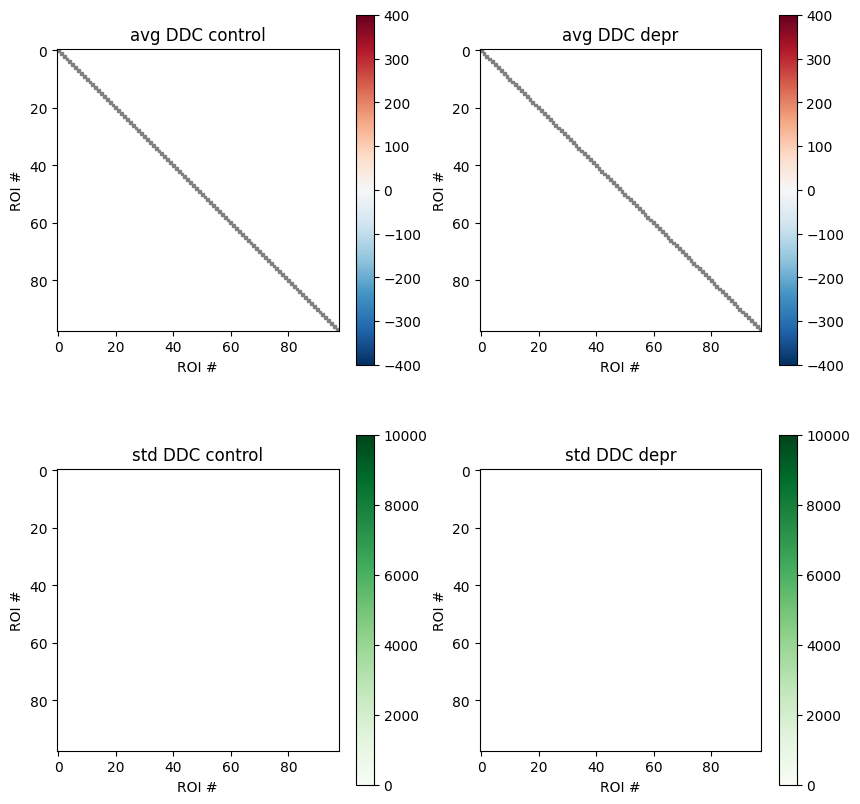

In [5]:
two_hemi_fc.plot_means_std_matrices(cmap='Greens')

### Whole brain statistically different connections

array([0.00966118, 0.04123055, 0.0318113 , ..., 0.04653689, 0.05031702,
       0.01937924])

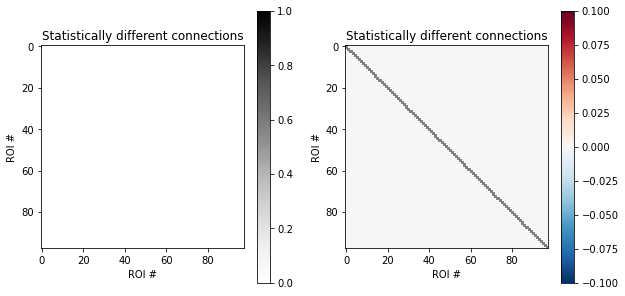

In [ ]:
two_hemi_fc.plot_significant_connections_matrix(bonferroni=True)

array([0.00966118, 0.04123055, 0.0318113 , ..., 0.04653689, 0.05031702,
       0.01937924])

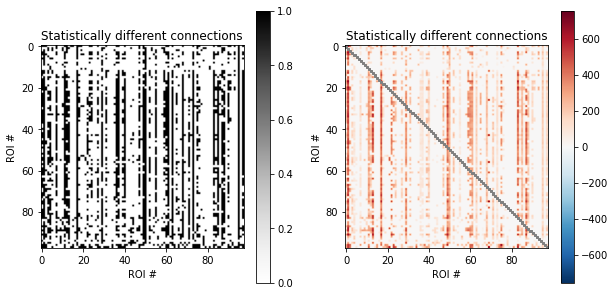

In [ ]:
two_hemi_fc.plot_significant_connections_matrix(bonferroni=False)

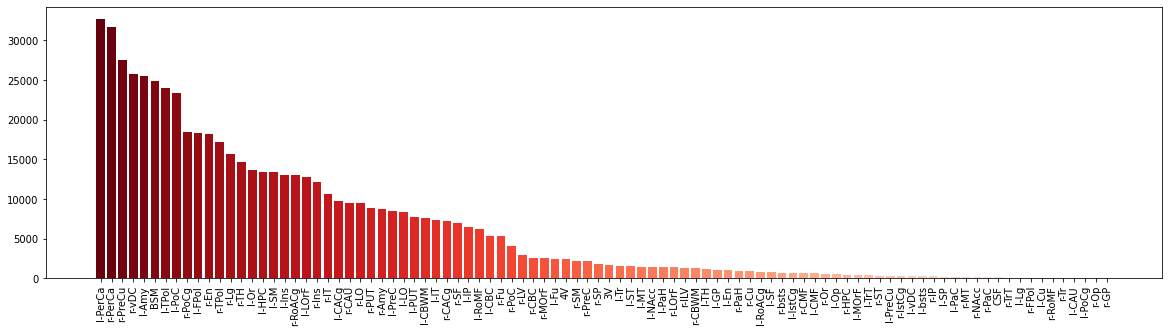

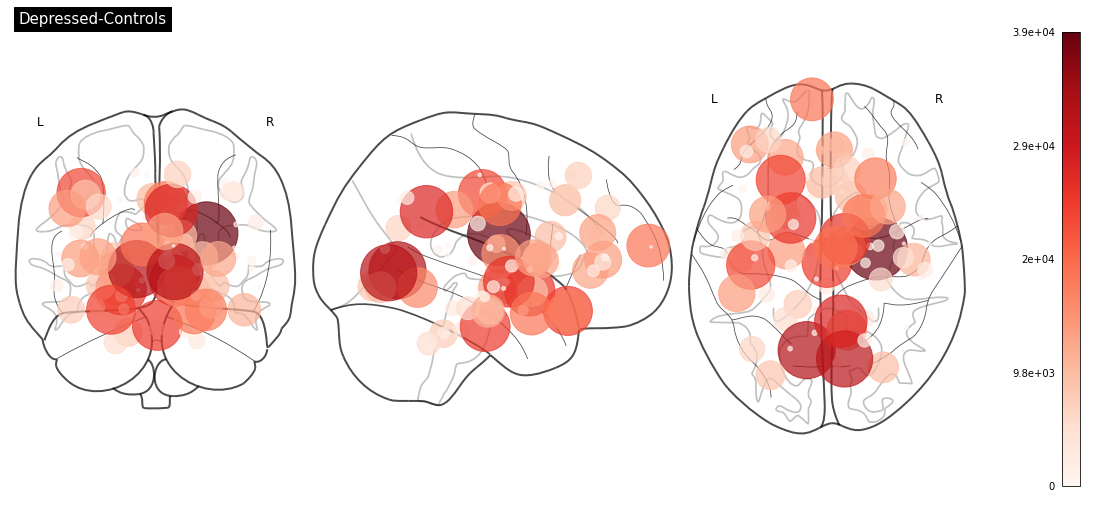

In [ ]:
two_hemi_fc.plot_significant_connections_bar(bonferroni=False)

In [ ]:
from nilearn import plotting
import numpy as np
import seaborn as sns



positions = pd.read_csv(
                "/nadata/cnl/abcd/data/imaging/fmri/rsfmri/interim/segmented/baseline/downloads/sub-NDARINV04GAB2AA/ROIs_centroid_coordinates.csv"
            )
coord_list = np.asarray(positions[["x", "y", "z"]])

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,7))
plotting.plot_markers(
    diff,
    coord_list,
    node_cmap="RdBu_r",
    figure=fig,
    node_vmin=-2e-18,
    node_vmax=2e-18,
    node_size=abs(np.mean(control,axis=0))*4e20,
    title="Controls average activation per ROI",
)
plt.savefig("/home/acamassa/ABCD/DDC_figures/Controls_activation_map.svg")

### Subnetwork statistically different connections

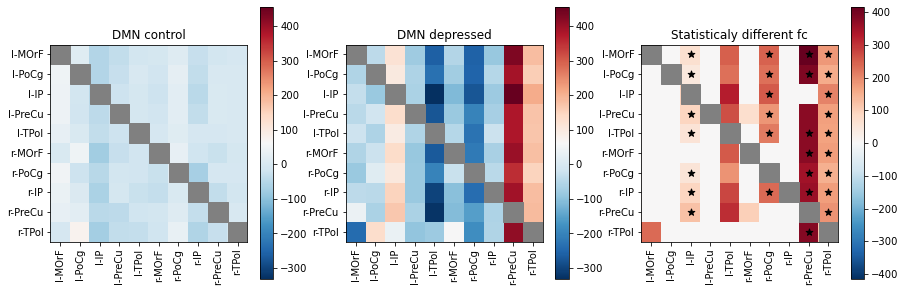

In [ ]:
two_hemi_fc.plot_network_heatmap("DMN")

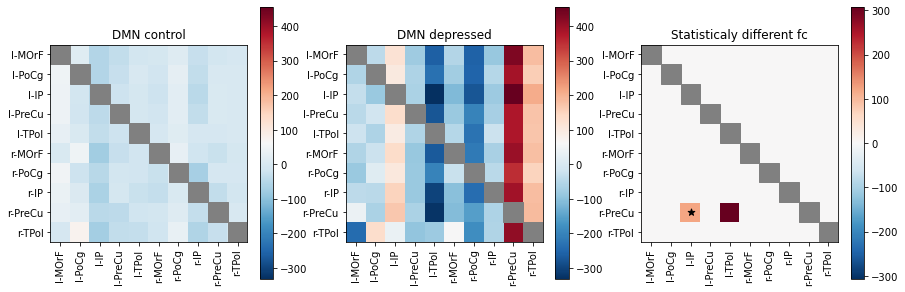

In [ ]:
two_hemi_fc.plot_network_heatmap("DMN", bonferroni=True)

/home/acamassa/.local/lib/python3.9/site-packages/nilearn/plotting/displays/_projectors.py:190: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(


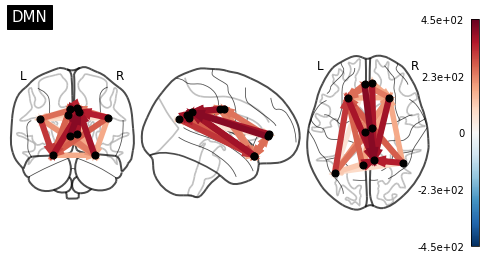

In [ ]:
two_hemi_fc.plot_network_connectivity_graph_diff("DMN", ev=400, bonferroni=False)

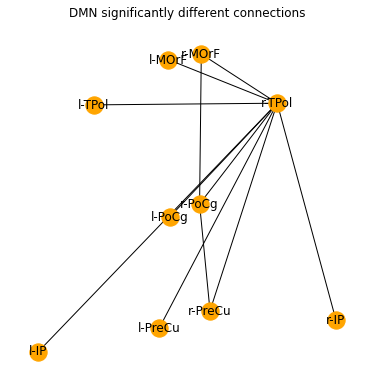

In [ ]:
two_hemi_fc.plot_network_significant_connections_graph("DMN")

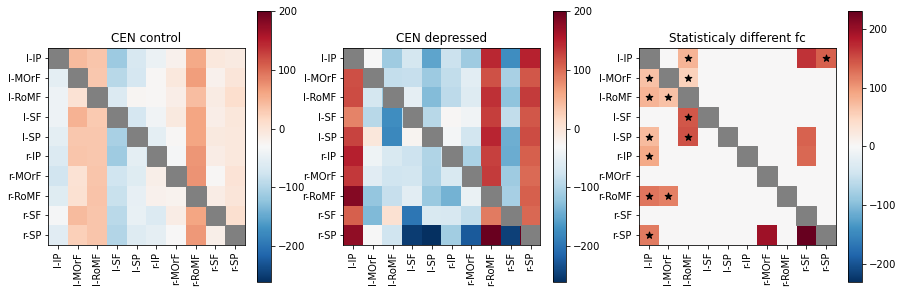

In [ ]:
two_hemi_fc.plot_network_heatmap("CEN")

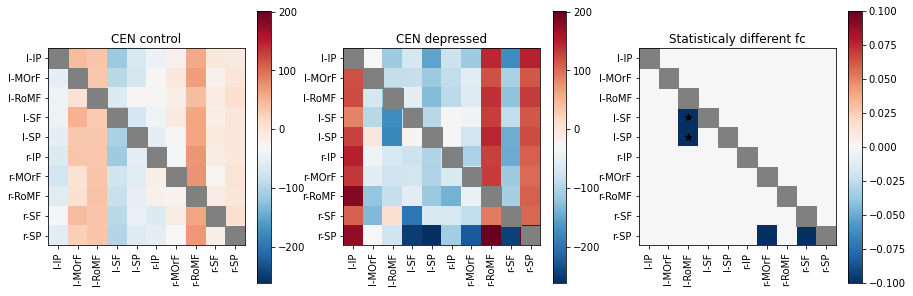

In [ ]:
diff=two_hemi_fc.plot_network_heatmap("CEN", bonferroni=True)

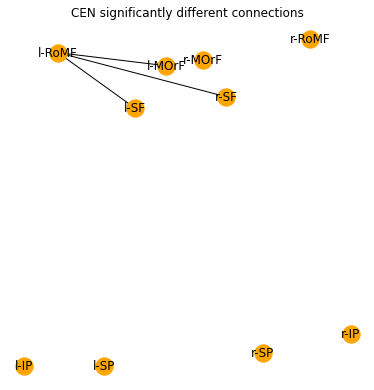

In [ ]:
two_hemi_fc.plot_network_significant_connections_graph("CEN")

/home/acamassa/.local/lib/python3.9/site-packages/nilearn/plotting/displays/_projectors.py:190: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(


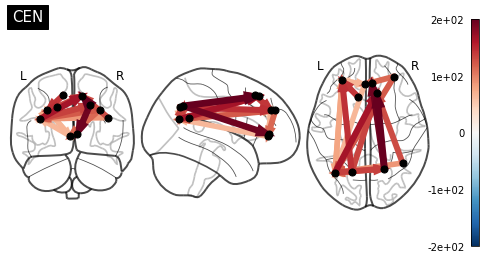

In [ ]:
two_hemi_fc.plot_network_connectivity_graph_diff("CEN", ev=None, bonferroni=False)

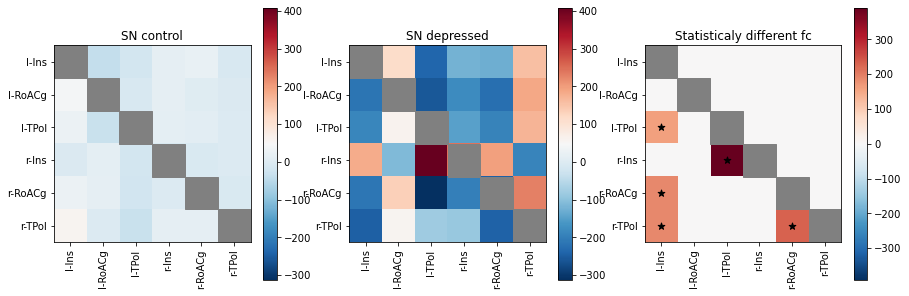

In [ ]:
two_hemi_fc.plot_network_heatmap("SN", bonferroni=True)

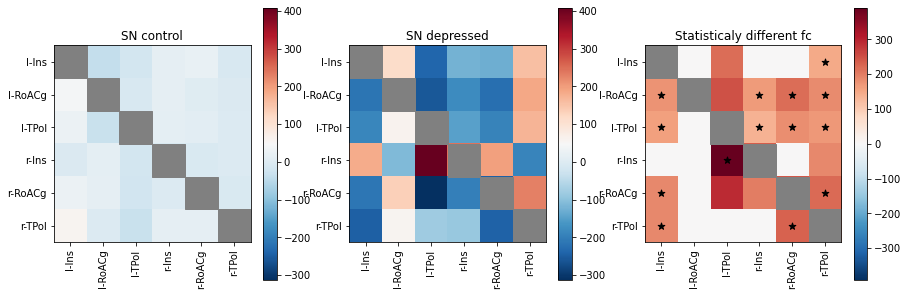

In [ ]:
two_hemi_fc.plot_network_heatmap("SN")

/home/acamassa/.local/lib/python3.9/site-packages/nilearn/plotting/displays/_projectors.py:190: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(


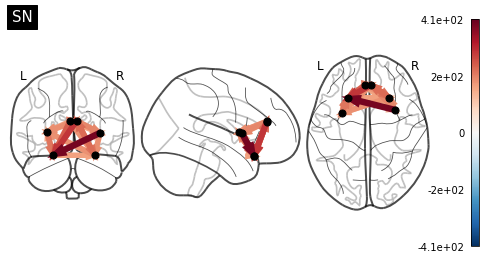

In [ ]:
two_hemi_fc.plot_network_connectivity_graph_diff("SN", ev=200, bonferroni=False)

In [ ]:
two_hemi_fc.plot_connection_probDistr(x='l-IP', y='l-SF')

<Figure size 720x720 with 0 Axes>

In [ ]:
two_hemi_fc.plot_interactive_connectivity_graph_diff()

/home/acamassa/.local/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '


### Regularized DDC

In [ ]:
RegDDC = FunctionalConnectivity(
    labels,
    n_roi=98,
    thrs=0.8,
    weights_file_name="subc_Reg_DDC*.csv",
    DDC_path=DDC_path,
    fig_dir=fig_dir,
)

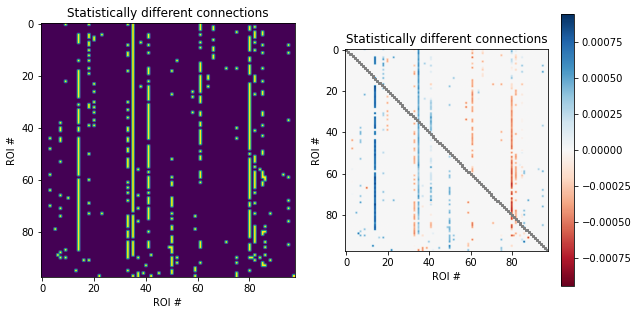

In [ ]:
RegDDC.plot_significant_connections_matrix()

In [ ]:
RegDDC.plot_interactive_connectivity_graph_diff()

/home/acamassa/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '
/home/acamassa/anaconda3/lib/python3.9/site-packages/nilearn/_utils/param_validation.py:72: UserWarning: The given float value must not exceed 0.0009407160506627096. But, you have given threshold=50 
  warnings.warn("The given float value must not exceed {0}. "


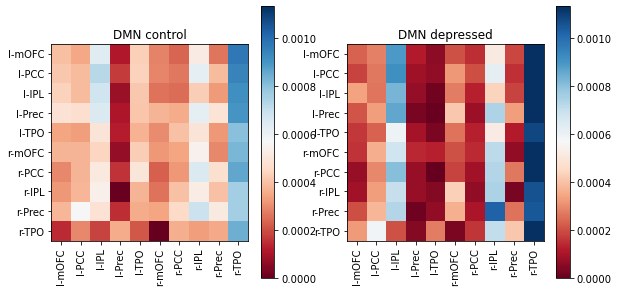

In [ ]:
RegDDC.plot_network_heatmap("DMN")

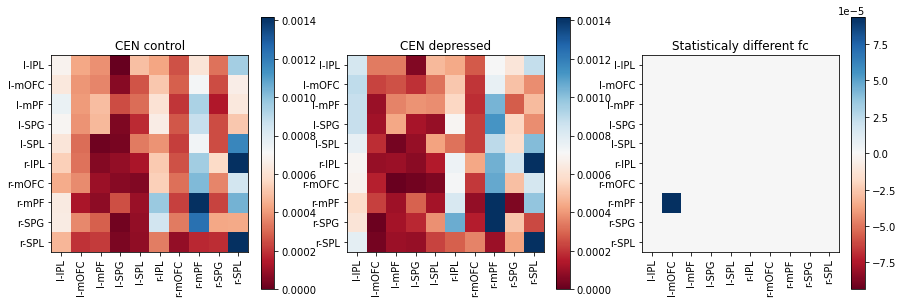

In [ ]:
RegDDC.plot_network_heatmap("CEN")

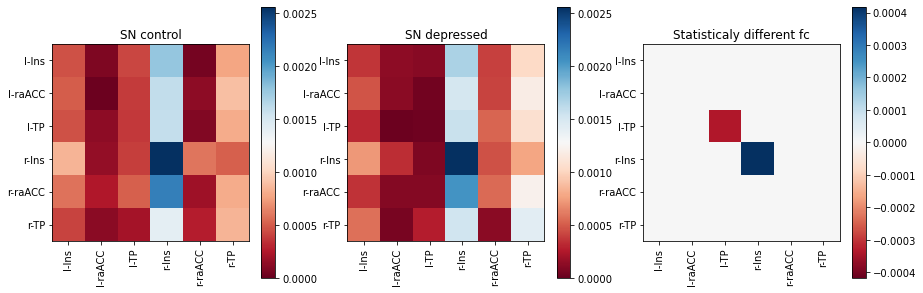

In [ ]:
RegDDC.plot_network_heatmap("SN")

### Covariance

In [ ]:
cov = FunctionalConnectivity(
    labels,
    n_roi=98,
    thrs=0.8,
    weights_file_name="subc_Cov*.csv",
    DDC_path=DDC_path,
    fig_dir=fig_dir,
)

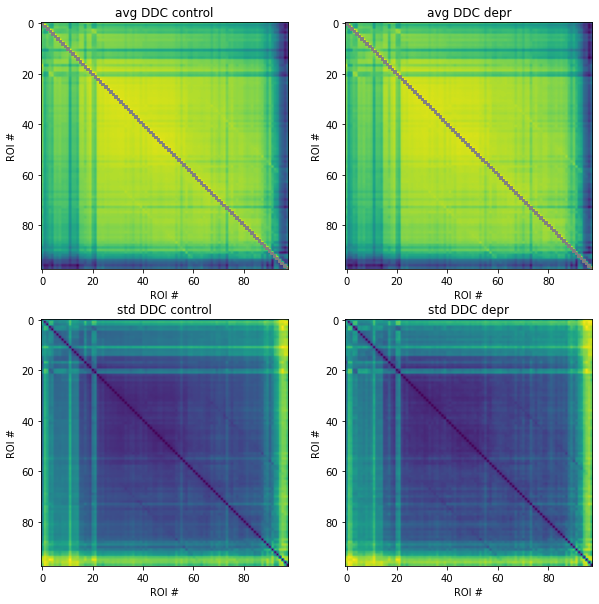

In [ ]:
cov.plot_means_std_matrices()

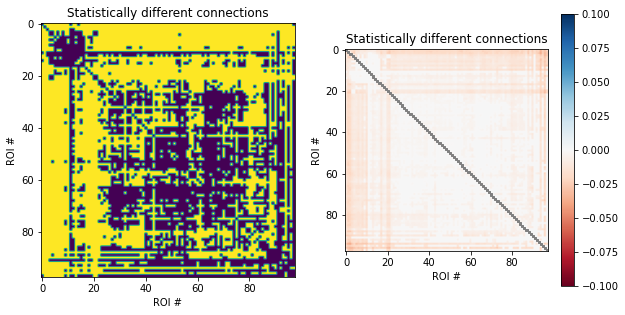

In [ ]:
cov.plot_significant_connections_matrix()

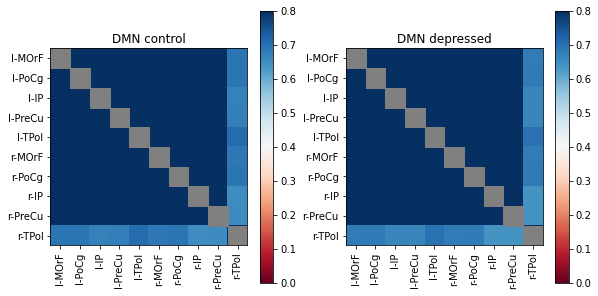

In [ ]:
cov.plot_network_heatmap("DMN")

In [ ]:
cov.plot_network_connectivity_graph_diff("DMN", ev=0.001)

no different connections to plot


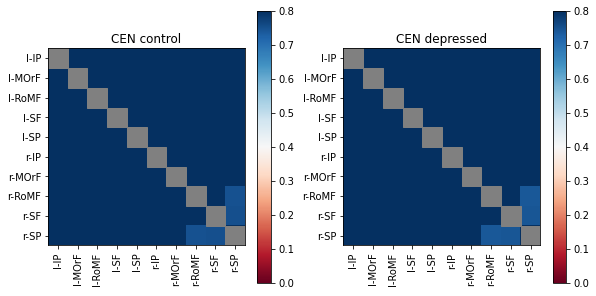

In [ ]:
cov.plot_network_heatmap("CEN")

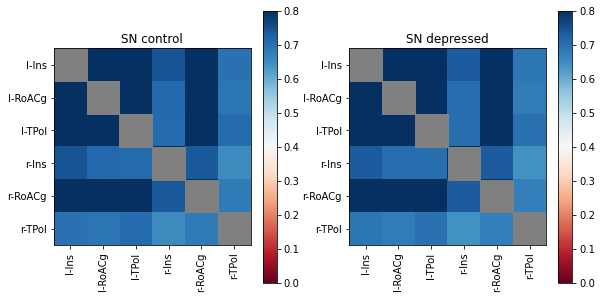

In [ ]:
cov.plot_network_heatmap("SN")